In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

import pandas as pd

weather = pd.read_csv("weatherHistory.csv", sep=',')

In [19]:
X = weather.drop(columns = 'Temperature (C)')
X = X.drop(columns = 'Precip Type')
X = X.drop(columns = 'Summary')
X = X.drop(columns = 'Daily Summary')
X = X.drop(columns = 'Formatted Date')
y = weather['Temperature (C)']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
Kitsuragi = LinearRegression()
Kitsuragi.fit(x_train, y_train)

LinearRegression()

In [27]:
print('y =', Kitsuragi.intercept_, end = ' ')
for i in range(0, len(Kitsuragi.coef_)):
  print('+', Kitsuragi.coef_[i], f'* {x_train.columns.values[i]}',  end = ' ')

y = 2.8174593573836333 + 0.8725145901016934 * Apparent Temperature (C) + -1.4199154156038596 * Humidity + 0.08069930394490177 * Wind Speed (km/h) + -0.0004218503745807567 * Wind Bearing (degrees) + 0.009155196137593524 * Visibility (km) + 0.0 * Loud Cover + -0.0001979284523191127 * Pressure (millibars) 

In [29]:
weather.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


Наибольшая корреляция у температуры и влажности (Humidity)

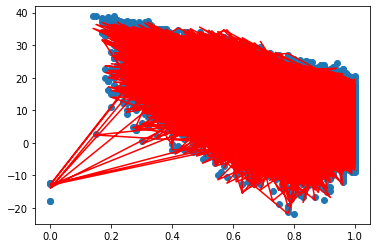

In [37]:
y_pred = Kitsuragi.predict(x_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x_test["Humidity"], y_test)
ax.plot(x_test["Humidity"], y_pred, color = "red")

In [38]:
print('mae:', mean_absolute_error(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

mae: 0.7402892543989921
mse: 0.8974723471616732
R2 score: 0.9901109329365582


Судя по метрикам, модель довольно точно определяет влажность по остальным параметрам. Если взглянуть на матрицу корреляции, можно заметить, что наименьшее влияние на результат оказывает параметр давление.